In [1]:
from src.IOSystem import IOSystem
from src.SupplyChain import SupplyChain

In [2]:
database = IOSystem(year=2022, language="Deutsch").load()

2025-07-27 14:44:29,269 - INFO - Fast database of the year 2022 was found - Loading...
2025-07-27 14:44:35,636 - INFO - Database has been loaded successfully in 6.367 seconds. 



In [ ]:
database.fast_db

'c:\\Users\\Jonas\\Documents\\Hector\\Kooperationsphase IO-Modelle\\exiobase_explorer\\exiobase\\fast load databases\\Fast_IOT_2022_pxp'

: 

In [5]:
import os
import pandas as pd
raw = pd.read_excel(os.path.join(database.config_dir, "units.xlsx"), sheet_name="Deutsch", dtype=object)
print(raw.head())
print(len(raw))

          Umweltindikator Exiobase Einheit     Divisor Nachkommastellen  \
0           Wertschöpfung            M.EUR        1000                2   
1           Beschäftigung          1000 p.        1000                2   
2             Arbeitszeit               hr     1000000                2   
3  Treibhausgasemissionen       kg CO2 eq.  1000000000                2   
4          Humantoxizität            cases           1                2   

        Neue Einheit  
0          Mrd. Euro  
1      Mio. Personen  
2       Mio. Stunden  
3  Megatonnen CO2-eq  
4              Fälle  
126


In [3]:
supplychain = SupplyChain(database=database, Region="Deutschland", Sektor="Textilien")
supplychain

SupplyChain(Number of Indices: 1, Hierarchy levels: {'Kontinent': None, 'Region': 'Deutschland', 'Wirtschaftssektor': None, 'Abschnitt': None, 'Unterabschnitt': None, 'Abteilung': None, 'Sektor': 'Textilien'})

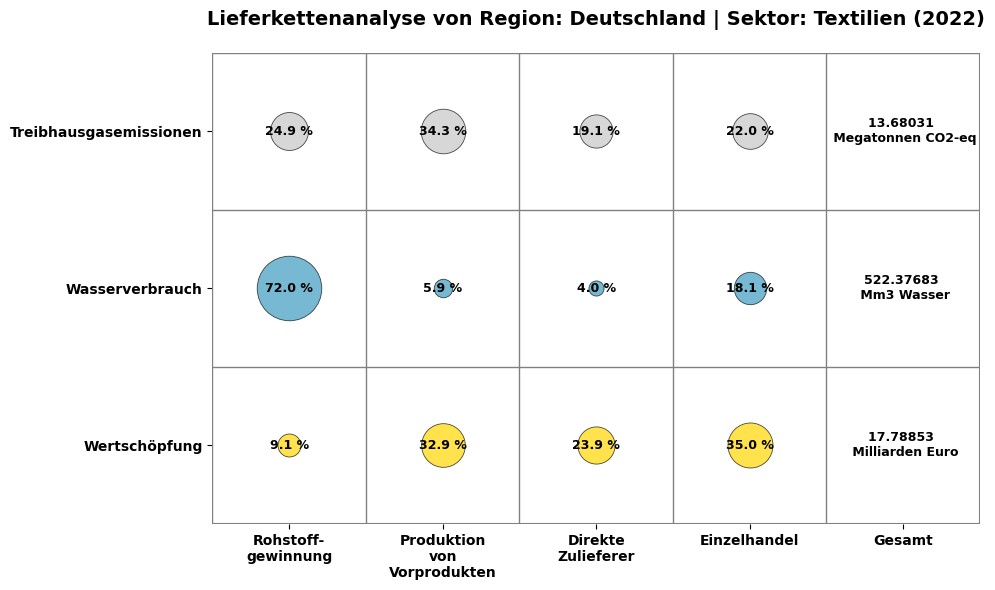

In [7]:
supplychain.plot_supplychain_diagram(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Wertschöpfung"])

In [ ]:
supplychain.plot_worldmap_by_impact(impact="Treibhausgasemissionen")

In [ ]:
supplychain.plot_worldmap_by_subcontractors(color="Blues")

In [ ]:
supplychain.plot_supplychain_diagram(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"])

In [ ]:
supplychain.calculate_all(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"], relative=False, decimal_places=5)